In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
# always useful
import numpy as np
import scipy.stats as stats
import scipy.integrate as integ
import pandas as pd
import seaborn as sb

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


The intregral of tot_g:  9670.576578134882
The integral of original shit:  89.0
Integral of normilized shit:  89.0


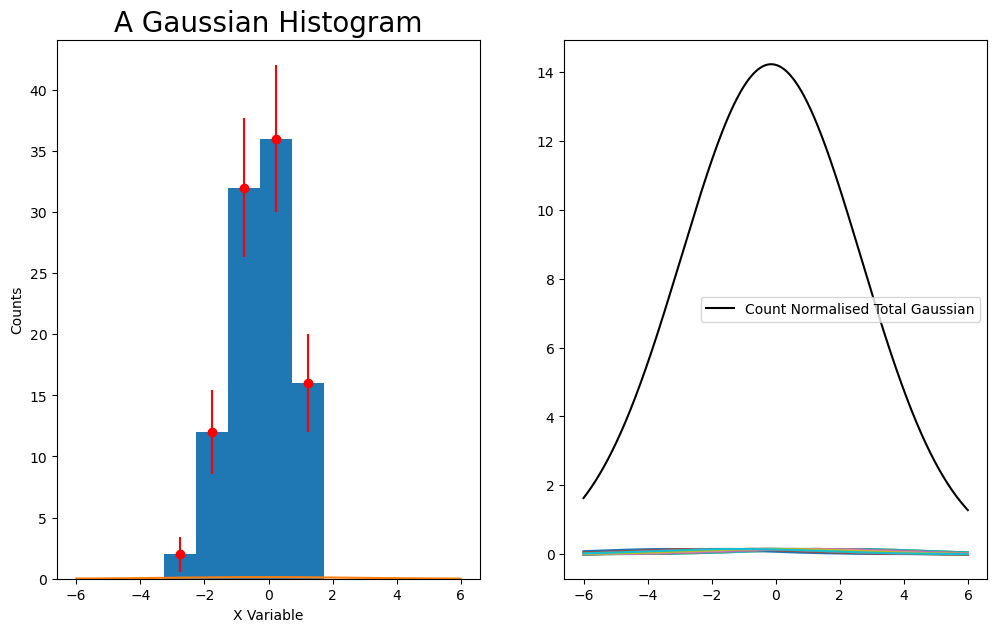

In [110]:
mu = 0
sigma = 1
N = 100
norm_dist = stats.norm(loc=mu, scale=sigma)
x = norm_dist.rvs(size=N)

# The fucking Histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# First Histograms
ax1.set_title("A Gaussian Histogram", fontsize=20)
ax1.set_xlabel("X Variable")
ax1.set_ylabel("Counts")
hist = ax1.hist(x,bins=np.arange(x.min(), x.max()))
first_integral = integ.trapz(hist[0])
bin_centers = np.mean(np.vstack([hist[1][:-1], hist[1][1:]]), axis=0) # Get Bin Centers for scatter plots
ax1.errorbar(bin_centers,hist[0],color="red", yerr=np.sqrt(hist[0]), fmt='o') # Show Error Bars



each_gaussians = []
for xi in x:
    each_gaussians.append(stats.norm(loc = xi, scale = 1.06*np.std(x)*np.power(N,0.2)))

ax2_xticks = np.arange(-6,6,0.01)
tot_g = np.zeros(ax2_xticks.shape)
for g in each_gaussians:
    ax2.plot(ax2_xticks,g.pdf(ax2_xticks))
    tot_g += g.pdf(ax2_xticks)
ax2.plot(ax2_xticks,tot_g,color="black",label="Count Normalised Total Gaussian")
ax2.legend()

print("The intregral of tot_g: ",integ.trapz(tot_g))
print("The integral of original shit: ", first_integral)
print("Integral of normilized shit: ", integ.trapz(tot_g * integ.trapz(hist[0]) / integ.trapz(tot_g)))
ax1.plot(np.arange(-6,6,0.01), tot_g * integ.trapz(hist[0]) / integ.trapz(tot_g))



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

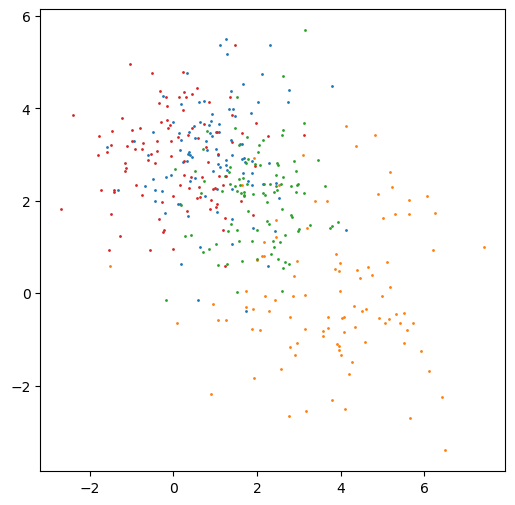

In [42]:
N = 4
sample_size = 100
gaussians = []
coords = []
for i in range(N):
    gaussians.append(stats.multivariate_normal(mean = [np.random.randint(5),np.random.randint(5)],cov=np.random.randint(1,3)))
    coords.append( gaussians[i].rvs(sample_size))


# The fucking Plot
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(N):
    x,y = zip(*coords[i])
    ax.scatter(x,y,s=1)


--2023-11-30 09:18:49--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2023-11-30 09:18:49--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce9fe8145ba22717f21b3bc8b7b.dl.dropboxusercontent.com/cd/0/inline/CIhNV8HZN23WSqX6zfiRVH07QrbPpkqOc4ICo7Z5jlhb3zEARkDZ83GVyky8zr75A40lAN9ri0q2hlhd-RWLX6Y_2F3o6Kgr7TsLmWACu9adpg7XEchdYerWb_uJ1xfUWjs/file# [following]
--2023-11-30 09:18:50--  https://uce9fe8145ba22717f21b3bc8b7b.dl.dropboxusercontent.com/cd/0/inline/CIhNV8HZN23WSqX6zfiRVH07QrbPpkqOc4ICo7Z5jlhb3zEARkDZ83GVyky8zr75A40lAN9ri0q2hlhd-RWLX6Y_2F3o

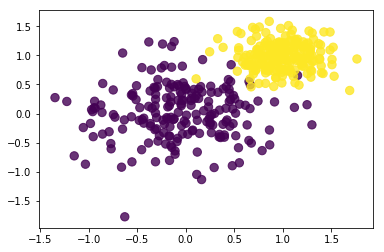

In [11]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/var/folders/59/2ssll6nn0s11xqwgwbgjf0wm0000gn/T/ipykernel_18243/3776252217.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = clean_data.groupby(pd.cut(clean_data['distances'], bins))


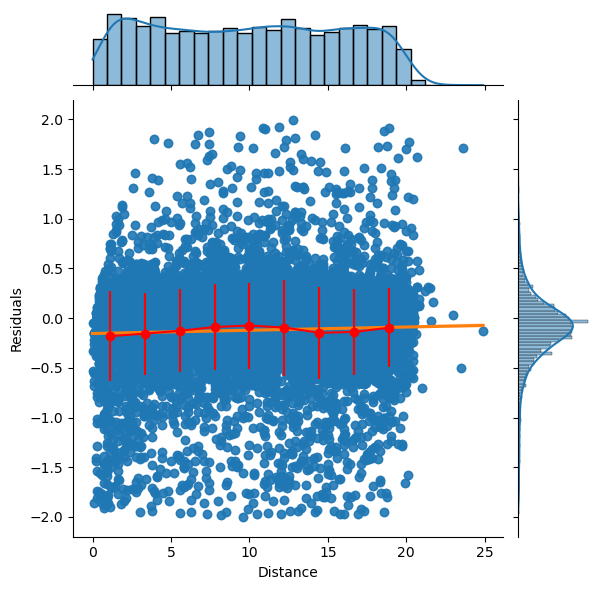

In [88]:
data = np.load("residuals_261.npy",allow_pickle=True)
data = pd.DataFrame(data.item())
clean_data = data[np.abs(data.residuals) < 2]
LinReg = stats.linregress(clean_data.distances,clean_data.residuals)
sb.jointplot(x = clean_data.distances,y = clean_data.residuals,kind = "reg",line_kws={"color": "C1"})
#sb.regplot(x = clean_data.distances,y = clean_data.residuals,line_kws={"color": "C1"})



bins = np.linspace(0, 20, num=10)  # Adjust the number of bins as needed

# Bin centers
x = 0.5 * (bins[:-1] + bins[1:])

# Group by bins and calculate mean and standard deviation
groups = clean_data.groupby(pd.cut(clean_data['distances'], bins))
y = groups['residuals'].mean().values
erry = groups['residuals'].std().values


plt.scatter(clean_data['distances'], clean_data['residuals'], alpha=0.5)

# Profile plot
plt.errorbar(x, y, yerr=erry, fmt='o-', color='red')

# Show plot
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.show()